In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string #to handle punctuations and special characters
from nltk.corpus import stopwords #To handle stopwords dictionary



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
# data load: 1000 leads.xlsx
#cd C:\Users\sysname\Desktop\Datascience\April

lead=pd.read_excel('1000 leads.xlsx')

In [67]:
lead.shape

(1001, 4)

In [68]:
#checking for duplicate values
lead.duplicated().sum()

0

In [69]:
lead.head(12)

,Lead Name,Location,Status,Status information
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn..."
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."
5,Karthik,mumbai,Not Converted,12/8/17(Surendra):i will check demo(attended d...
6,atul dubey,delhi,Not Converted,14/8/17(Surendra):asking code
7,praneeth,pune,Not Converted,11|aUg|moHan:mail shred for ML Tensorflow corp...
8,Smita Shinde,bangalore,Not Converted,11|AuG|moHan:askng code
9,shiba,bangalore,Not Converted,NaN


<AxesSubplot:xlabel='count', ylabel='Location'>

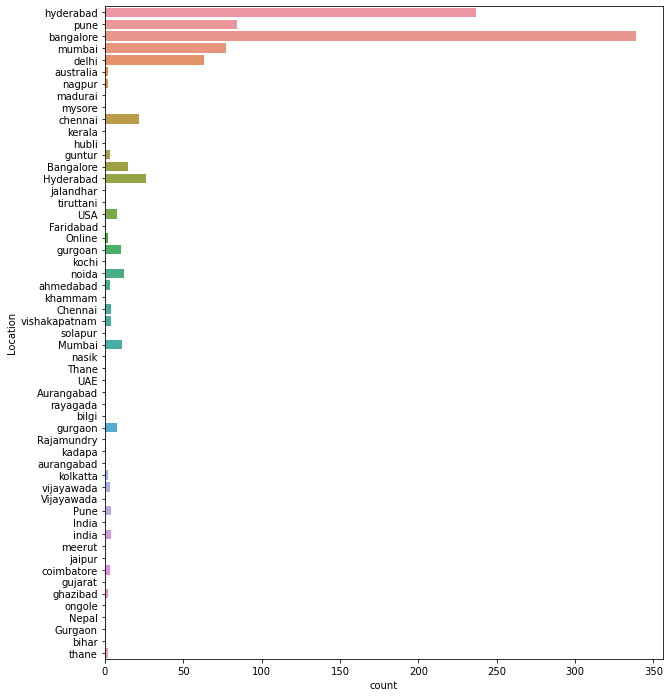

In [70]:
plt.figure(figsize=(10,12))
sns.countplot(data=lead, y='Location')

In [71]:
lead['Location'].unique()

array(['hyderabad', 'pune', 'bangalore', 'mumbai', 'delhi', 'australia',
       'nagpur', 'madurai', 'mysore', 'chennai', nan, 'kerala', 'hubli',
       'guntur', 'Bangalore', 'Hyderabad', 'jalandhar', 'tiruttani',
       'USA', 'Faridabad', 'Online', 'gurgoan', 'kochi', 'noida',
       'ahmedabad', 'khammam', 'Chennai', 'vishakapatnam', 'solapur',
       'Mumbai', 'nasik', 'Thane', 'UAE', 'Aurangabad', 'rayagada',
       'bilgi', 'gurgaon', 'Rajamundry', 'kadapa', 'aurangabad',
       'kolkatta', 'vijayawada', 'Vijayawada', 'Pune', 'India', 'india',
       'meerut', 'jaipur', 'coimbatore', 'gujarat', 'ghazibad', 'ongole',
       'Nepal', 'Gurgaon', 'bihar', 'thane'], dtype=object)

In [72]:
#NAN replace with highest occurred location 
# All the locations converted lower case to avoid double entries 
lead['Location']=lead['Location'].str.lower()
lead['Location']=lead['Location'].fillna('bangalore')


In [10]:
lead['Status '].unique()

array(['Not Converted', 'Converted ', 'NOt Converted', nan, 'Conveted'],
      dtype=object)

In [73]:
#Status coulmn NAN and misentry
lead['Status ']=lead['Status '].fillna('Not Converted')
lead['Status ']=lead['Status '].replace('NOt Converted','Not Converted')
lead['Status ']=lead['Status '].replace('Conveted','Converted')
lead['Status ']=lead['Status '].str.strip()

In [74]:
lead['Status '].value_counts()

Not Converted    870
Converted        131
Name: Status , dtype: int64

In [75]:
lead.isnull().sum()

Lead Name              0
Location               0
Status                 0
Status information    24
dtype: int64

In [76]:
# drop NAN from Lead (output param)
lead=lead.dropna()

In [77]:
stopwords_cus = [i for i in stopwords.words('english')
                  if i not in ["not","no", "nor","don't", "aren't",
 "couldn't",
 "didn't",
 "doesn't",
 "hadn't",
 "hasn't",
 "haven't",
 "isn't",
 "mightn't",
 "mustn't",
 "needn't",
 "shouldn't",
 "wasn't",
 "weren't",
 "won't",
 "wouldn't" ]]
#print(stopwords_cus)

def message_text_process(mess):
    no_punctuation = [char for char in mess if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [word for word in no_punctuation.split() if word.lower() 
            not in stopwords_cus]

In [78]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [79]:
lead["num_char"] = lead["Status information"].apply(lambda x: len(x))

<Figure size 1080x540 with 0 Axes>

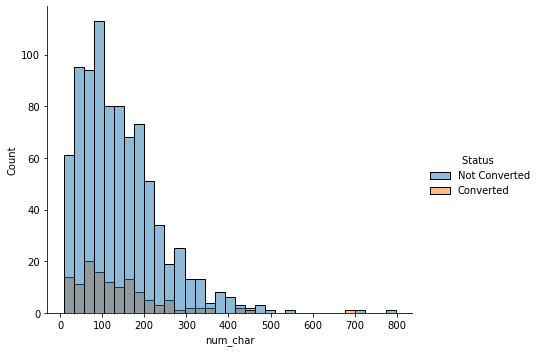

In [80]:
plt.figure(figsize=(12,6), dpi=90)
sns.displot(data=lead, x="num_char", hue="Status ", aspect=1.2)


In [81]:
import nltk

In [82]:
#nltk.download("punkt")

In [83]:
lead["num_words"] = lead["Status information"].apply(lambda x : len([i for i in nltk.word_tokenize(x) if i not in string.punctuation]))

In [84]:
import re

In [85]:
lead.head()

,Lead Name,Location,Status,Status information,num_char,num_words
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn...",133,18
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema...",171,27
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,16,2
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,86,13
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",118,19


In [86]:
data=lead.copy()

In [87]:
data["Status "].unique()

array(['Not Converted', 'Converted'], dtype=object)

In [88]:
# remove special character
data.columns = data.columns.str.rstrip()

In [89]:
data.head()

,Lead Name,Location,Status,Status information,num_char,num_words
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn...",133,18
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema...",171,27
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,16,2
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,86,13
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",118,19


In [90]:
data["Status"].unique()

array(['Not Converted', 'Converted'], dtype=object)

In [91]:
data["Status"].replace({"Not Converted": 1, "Converted": 0}, inplace=True)

In [92]:
# label encoding the locations
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [93]:
data["Location"] = le.fit_transform(data["Location"])


In [94]:
#nltk.download("wordnet")

In [95]:
#nltk.download("omw-1.4")

In [96]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lamma = WordNetLemmatizer()
def preprocess(txt):
  x = txt.lower()
  x = re.sub("\d+[/?]\w+[/?]\w+:|\d+[|]\w+[|]\w+:|\d+[/]\w+[/]\w+[(]\w+[)]:?", "", x)
  x = re.sub("int[a-z]+d$", "interested", x)
  #x =re.sub("not interested", "notinterested", x)
  x = re.sub("[\d+-?,'.]", "", x)
  x = [i for i in nltk.word_tokenize(x) if i not in stopwords_cus and len(i)>1 and i not in string.punctuation ] 
  x = [lamma.lemmatize(i) for i in x]
  return " ".join(x)

In [97]:
data["cleaned_txt"] = data["Status information"].apply(preprocess)

In [98]:
data["cleaned_txt"].head()

0    share detail available evng postponed plan tra...
1    cal tmrw shared detail email share detail emai...
2                                                  rnr
3                      want server cal busy reg server
4    rnr gave info said revert hr planning next mon...
Name: cleaned_txt, dtype: object

In [99]:
#data["cleaned_txt_try1"]=data["cleaned_txt"].replace({"not interested":"notinterested"},regex=True)

In [100]:
print(data["cleaned_txt"][0])
print(data["Status"][0])

share detail available evng postponed plan training currently not interested
1


In [101]:
data["Status"].value_counts()


1    848
0    129
Name: Status, dtype: int64

In [102]:
# Upsampling using resample class
from sklearn.utils import resample

#separating the class
data_major = data[data["Status"]==1]
data_minor = data[data["Status"]==0]

data_minor_upsampled = resample(data_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=602,    # to match majority class
                                 random_state=20) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_major, data_minor_upsampled], axis=0)

In [103]:
data_upsampled["Status"].value_counts()

1    848
0    602
Name: Status, dtype: int64

Task-1:Based on customer status identify the topic whether the customer showing interest or not towards our product

In [104]:
# using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  #DTM
cv = CountVectorizer(max_features=500, ngram_range=(2,2)) #  for topic modeling


In [105]:
vector_txt2 = cv.fit_transform(data_upsampled["cleaned_txt"])

In [106]:
# topic modeling using LDA(latent dirichlet allocation)
from sklearn.decomposition import LatentDirichletAllocation

In [107]:
lda_model = LatentDirichletAllocation(n_components=2,learning_method='online',random_state=42,max_iter=5)
# interested and not interested- 2 components

In [108]:
lda_top = lda_model.fit_transform(vector_txt2)

In [109]:
print(data_upsampled["Status information"][0])
print(data_upsampled["Status"][0])
print(data_upsampled["cleaned_txt"][0])

14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now
1
share detail available evng postponed plan training currently not interested


In [110]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  37.09423344437875 %
Topic  1 :  62.905766555621234 %


In [111]:
#Let us check what are the top words that comprise the topics. This would give us a view of what defines each of these topics
topics = dict()
vocab = cv.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:9]
    tp = "Topic "+str(i)+": "
    #  print(tp)
    topics[tp] = []
    for t in sorted_words:
        topics[tp].append(t[0])
        #  print(t[0],end=" ")
        #  print("\n")

In [112]:
# now we understand what topics will have what words that are being considered
for k,v in topics.items():
  print(f"{k} : {v}")

Topic 0:  : ['shared detail', 'share detail', 'not reachable', 'rnr shared', 'detail rnr', 'cal back', 'let know', 'detail shared', 'looking ct']
Topic 1:  : ['rnr rnr', 'not interested', 'share detail', 'rnr call', 'get back', 'iam busy', 'not connected', 'rnr not', 'iam not']


In [113]:
# lets check for document 1
print("Document 1: ")
for i,topic in enumerate(lda_top[1]):
  print("Topic ",i,": ",topic*100,"%")

Document 1: 
Topic  0 :  92.44280984037997 %
Topic  1 :  7.557190159620042 %


In [114]:
print(data_upsampled["Status information"][1])
print(data_upsampled["cleaned_txt"][1])
print(data_upsampled["Status"][1])

14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification
cal tmrw shared detail email share detail email check revert received email im looking asq certification
1


In [115]:
# lets check for document 3
print("Document 3: ")
for i,topic in enumerate(lda_top[3]):
  print("Topic ",i,": ",topic*100,"%")

Document 3: 
Topic  0 :  21.43752460615816 %
Topic  1 :  78.56247539384185 %


In [116]:
print(data_upsampled["Status information"][3])
print(data_upsampled["cleaned_txt"][3])
print(data_upsampled["Status"][3])

14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server
want server cal busy reg server
1


In [117]:
# topic modeling system
def topic_model():
  user_mgs = input("Enter your mgs: ")
  x = preprocess(user_mgs)
  x = cv.transform([x])
  lda_x = lda_model.transform(x)
  tpic = []
  tpc = lambda x : "not interested" if x == 1 else "interested"
  for i,topic in enumerate(lda_x[0]):
    print("Topic ",i,": ",topic*100,"%")
    tpc_name = tpc(i)
    prc = topic*100
    tpic.append([tpc_name,prc])
  return tpic

In [118]:
my_topic = topic_model()


Enter your mgs: 14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now
Topic  0 :  37.09423344437876 %
Topic  1 :  62.90576655562125 %


In [119]:
for i in my_topic:
  print(i )

['interested', 37.09423344437876]
['not interested', 62.90576655562125]


In [121]:
topic_model()

Enter your mgs: share details and i am interested
Topic  0 :  51.67859797772828 %
Topic  1 :  48.32140202227173 %


[['interested', 51.67859797772828], ['not interested', 48.32140202227173]]

##Task-2:Based on location, status identify whether the lead
going to be converted on not.

In [134]:
tf = TfidfVectorizer(max_features=700) # we will use tf for classification
vector_txt = tf.fit_transform(data_upsampled["cleaned_txt"])


In [135]:
add_col = data_upsampled["Location"].values.reshape(-1,1)

In [136]:
x = vector_txt.toarray()
y = data_upsampled["Status"]

In [137]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
# train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(1160, 700)
(290, 700)
(1160,)
(290,)


In [151]:
# evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
# navie bayes models
from sklearn.naive_bayes import MultinomialNB, GaussianNB
#how many times each word appears,this helps the model by giving it information, not just on whether the word was there,
#but also how many times the word appeared because we know that this is a signal to help our classifier.
#The algorithm assumes that the features are drawn from a multinomial distribution


In [152]:
#Training
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [153]:
predicted = model.predict(x_test)
expected = y_test

In [154]:
# Evaluation 
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       129
           1       0.96      0.49      0.65       161

    accuracy                           0.71       290
   macro avg       0.78      0.73      0.70       290
weighted avg       0.80      0.71      0.69       290

[[126   3]
 [ 82  79]]


In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(expected,predicted)

0.7068965517241379

In [156]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = model, X = x,\
     y = y, cv = 20)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
accuracies

Accuracy Mean 0.7118531202435312 Accuracy Variance      0.05718911928942327


array([0.68493151, 0.69863014, 0.68493151, 0.67123288, 0.67123288,
       0.73972603, 0.63013699, 0.76712329, 0.71232877, 0.67123288,
       0.625     , 0.73611111, 0.81944444, 0.80555556, 0.69444444,
       0.63888889, 0.66666667, 0.75      , 0.77777778, 0.79166667])

In [157]:
#classification system
def Status(user):
    input = user
    input_p = preprocess(input)
    input_m = tf.transform([input_p])
    out = model.predict(input_m.toarray())
    print(input,input_p,input_m,out)
    if out == 1:
        return "Not Convertable"
    else:
        return "Convertable"


In [162]:
mgs=input()
Status(mgs)

16|AuG|moHan:rnr
16|AuG|moHan:rnr rnr   (0, 468)	1.0 [0]


'Convertable'

In [163]:
for i in [4,2,103]:
  print(data.loc[i,"Status information"])
  print(data.loc[i,"Status"])

14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details
1
16|AuG|moHan:rnr
0
3/8/17(Surendra):share me link 3/8/17(Surendra):i will get back share me office details 27/11/17(Surendra):RNR 28/11/17(Surendra):wrong number call disconnected(Number correct) 1/12/17(Surendra):wrong number iam not abdul
1


In [164]:
import pickle

#pickling the topic modeling files
pickle.dump(cv, open("cv_vectorizer.pkl", "wb"))
pickle.dump(lda_model, open("lda_model.pkl", "wb"))

In [165]:
pickle.dump(stopwords_cus, open("stopwords.pkl","wb"))


In [166]:
# pickling for classification POC
import pickle

pickle.dump(tf, open("tf_vectorizer.pkl","wb"))
pickle.dump(model, open("GNB.pkl","wb"))